In [1]:
!nvidia-smi # Check whether your system has a GPU

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
albumentations                1.3.1
altair                        5.0.1
asttokens                     2.2.1
async-timeout                 4.0.2
attrs                         23.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
blinker                       1.6.2
blis                          0.7.9
blurhash                      1.1.4
boltons                       23.0.0
boost                         0.1
brotlipy                      0.7.0
cachetools                    5.3.1
catalogue                     2.0.8
certifi                       2023.5.7
cffi                          1.15.1
charset-normalizer            2.0.4
click                         8.1.4
clock                         0.1
cmake                         3.26.4
colorama        

### Dataset Download

In [2]:
dataset_url = "https://drive.google.com/file/d/1Ru1dLP8vXUnVbDiwQqf--qyiYkHd9C_1/view?usp=share_link"
!gdown 1Ru1dLP8vXUnVbDiwQqf--qyiYkHd9C_1

Downloading...
From: https://drive.google.com/uc?id=1Ru1dLP8vXUnVbDiwQqf--qyiYkHd9C_1
To: d:\SRM-IEEE-Winter-School\SRM-IEEE-SPS-Winter-School\07_12_22\flower_photos.tgz

  0%|          | 0.00/229M [00:00<?, ?B/s]
  0%|          | 524k/229M [00:00<00:54, 4.19MB/s]
  1%|          | 1.57M/229M [00:00<00:37, 6.10MB/s]
  1%|▏         | 3.15M/229M [00:00<00:32, 6.88MB/s]
  2%|▏         | 5.24M/229M [00:00<00:22, 9.77MB/s]
  3%|▎         | 6.29M/229M [00:00<00:23, 9.63MB/s]
  3%|▎         | 7.86M/229M [00:00<00:21, 10.2MB/s]
  4%|▍         | 9.44M/229M [00:01<00:20, 10.5MB/s]
  5%|▍         | 11.0M/229M [00:01<00:20, 10.6MB/s]
  5%|▌         | 12.6M/229M [00:01<00:19, 11.1MB/s]
  6%|▌         | 14.2M/229M [00:01<00:22, 9.43MB/s]
  7%|▋         | 16.3M/229M [00:01<00:19, 11.0MB/s]
  8%|▊         | 17.8M/229M [00:01<00:18, 11.1MB/s]
  8%|▊         | 19.4M/229M [00:01<00:19, 10.9MB/s]
  9%|▉         | 21.0M/229M [00:02<00:19, 10.9MB/s]
 10%|▉         | 22.5M/229M [00:02<00:18, 11.2MB/s]
 11%|█ 

In [3]:
import shutil
shutil.unpack_archive('flower_photos.tgz','./')

In [4]:
!rm -rf  flower_photos/LICENSE.txt

In [ ]:
import os
names = os.listdir('flower_photos')
os.makedirs(os.path.join('flower_photos/train/'),exist_ok=True)
for name in names:
    shutil.move(f'flower_photos/{name}',f'flower_photos/train/')
    os.makedirs(os.path.join('flower_photos/validation/',name),exist_ok=True)

In [6]:
import shutil
train_names = os.listdir('flower_photos/train/')
for train_name in train_names:
    file_names = sorted(os.listdir(os.path.join('flower_photos/train/',train_name)))
    for file_name in file_names[-100:]:
        shutil.move(os.path.join('flower_photos/train/',train_name,file_name),os.path.join('flower_photos/validation/',train_name))

# Import packages

In [5]:
import numpy as np
import cv2
import torch 
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from tqdm import tqdm

numpy 
- A scientific computing library
- Supports array operations and manipulations
- Built-in functions like array sum, diff, mean, average, min, max etc.

cv2
- To read and write images
- To perform basic vision algorithms like RGB to HSV, Gaussian Blur, Dilation, Histogram, Shape detection etc.

torch
- The open source ML framework for deep learning
- Has a pythonic interface

torchvision
- consists of popular datasets, model architectures, and common image transformations for computer vision
- Contains built in data augmentations

matplotlib
- It is a data visualization library for python
- It supports graphical plotting and viewing images and other data

nn
- The base module with which we can create and train neural nets
- Provides built-in classes for common neural network layers like Conv, Pooling, Activations, Normalizations, Dropout etc.

optim
- It is a package for implementing various optimization algorithms for model training
- Built-in optimizers like SGD, Adam, Adagrad, RMSprop etc.

tqdm
- It is a library used to display a progress bar for loops

# Preprocess inputs

In [6]:
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()]) # Define the set of transformations to be applied on the input data

In [ ]:
# transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

ToTensor()
 - converts the image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W) with a range [0.0, 1.0]

Normalize() 
- output[channel] = (input[channel] - mean[channel]) / std[channel]

- Normalization helps get data within a range and reduces the skewness which helps learn faster and better. 
- Normalization can also tackle the diminishing and exploding gradients problems.

# Custom Dataloaders using Image Folder function

- Combines a dataset and a sampler
- Provides an iterable over the given dataset
- Supports single- or multi-process loading
- Customizing loading order
- Automatic batching

In [7]:
trainset = datasets.ImageFolder(root ='flower_photos/train',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True)

In [8]:
valset = datasets.ImageFolder(root ='flower_photos/validation',transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=8, shuffle=True)

In [9]:
dataiter = iter(trainloader)

Now that we have an iterator, let's visualize our data

In [10]:
images, gt_labels = next(dataiter) # The first minibatch of data

In [11]:
print(images.shape)
print(gt_labels.shape)

torch.Size([8, 3, 224, 224])
torch.Size([8])


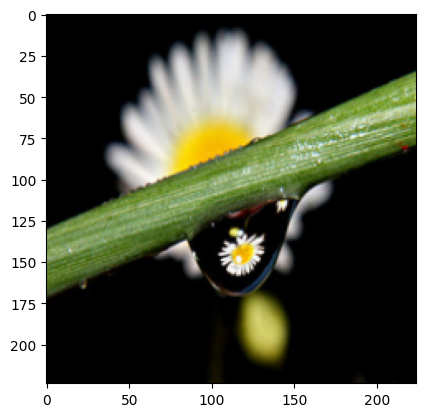

In [12]:
 # Visualize an image sample
plt.imshow((images[2].squeeze()).permute(1,2,0).numpy())

In [13]:
classes = trainset.classes

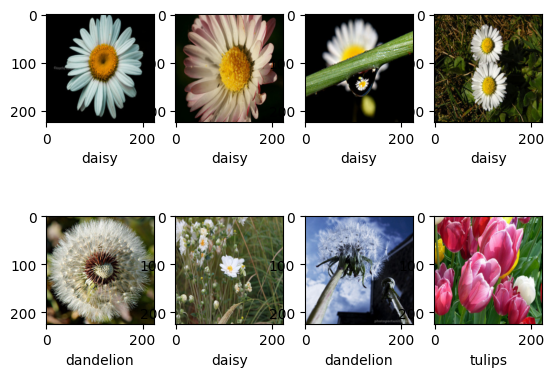

In [14]:
# Visualize all images in the minibatch
figure = plt.figure()
total_samples = 8
for index in range(1,total_samples+1):
    ax = plt.subplot(2, 4, index)
    ax.set_xlabel(classes[gt_labels[index-1].item()])
    # plt.axis('off')
    plt.imshow(images[index-1].squeeze().permute(1,2,0).numpy())

In [15]:
# Visualize the Ground truth labels
print(gt_labels)

tensor([0, 0, 0, 0, 1, 0, 1, 4])


In [16]:
# Visualize the onehot encoding of the labels
onehot_labels = nn.functional.one_hot(gt_labels, num_classes=10)
print(onehot_labels)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])


# Let's build our AlexNet
![](assets/AlexNet.jpeg)

In [39]:
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 10, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [40]:
model = AlexNet()

In [41]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_

### Model Training

In [42]:
model = model.cpu()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 2
pbar = tqdm(range(epochs))
best_accuracy = 0.0

  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
time_init = time() # record the time at which training started

for e in pbar:
    running_loss = 0
    for images, gt_labels in tqdm(trainloader):
        images = images.cpu()
        gt_labels = gt_labels.cpu()
    
        # Training pass
        optimizer.zero_grad() # reset the gradients of model weights
        
        output = model(images)
        loss = criterion(output, gt_labels)
        
        # Calculate the gradients of the learnable parameters
        loss.backward()
        
        # Modify the model weights as per the gradients
        optimizer.step()
        
        running_loss += loss.item()
    average_loss = running_loss/len(trainloader)
    
    # perform validation
    correct_count = 0
    total_count = 0
    for images,gt_labels in valloader:
      pred_probs = model(images.cpu())
      predicted_labels = torch.argmax(pred_probs, dim=-1)

      for i in range(len(gt_labels)):
        if predicted_labels[i]==gt_labels[i]:
          correct_count = correct_count+1
        total_count = total_count+1       

    accuracy = correct_count/total_count
    
    # save the model weights
    if accuracy>=best_accuracy:
      best_accuracy = accuracy
      torch.save(model, './best_flower_model.pt')
    torch.save(model, './last_flower_model.pt') 

    print(f"\nEpoch {e} - Training loss: {average_loss}, val accuracy : {accuracy}")
print(f"Training Time (in minutes) = {(time()-time_init)/60}")

 50%|█████     | 1/2 [03:58<03:58, 238.86s/it]


Epoch 0 - Training loss: 1.750569295222573, val accuracy : 0.2


100%|██████████| 2/2 [08:10<00:00, 245.12s/it]


Epoch 1 - Training loss: 1.605287959954, val accuracy : 0.308
Training Time (in minutes) = 7.9334599057833355


### Model Validation

In [45]:
images, gt_labels = next(iter(valloader))

with torch.no_grad():
    pred_probs = model(images.cpu())

predicted_labels = torch.argmax(pred_probs, dim=-1)

### Result Visualisation

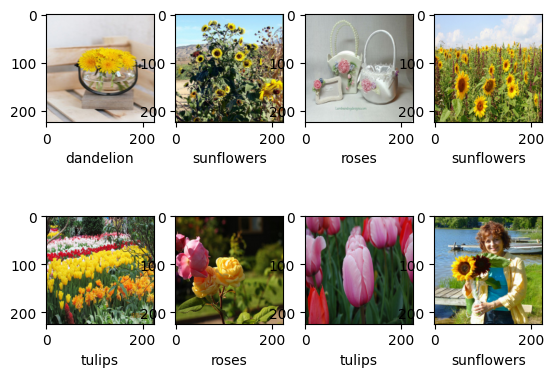

In [46]:
# Visualize all images in the minibatch
figure = plt.figure()
total_samples = 8
for index in range(1,total_samples+1):
    ax = plt.subplot(2, 4, index)
    ax.set_xlabel(classes[gt_labels[index-1].item()])
    # plt.axis('off')
    plt.imshow(images[index-1].squeeze().permute(1,2,0).numpy())

In [47]:
print(f"Ground truth labels : {gt_labels}")

Ground truth labels : tensor([1, 3, 2, 3, 4, 2, 4, 3])


In [48]:
print(f"Predicted labels : {predicted_labels}",)

Predicted labels : tensor([3, 3, 1, 3, 3, 3, 1, 1])


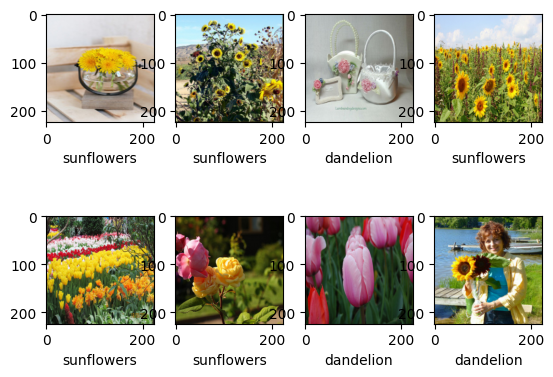

In [49]:
# Visualize all images in the minibatch
figure = plt.figure()
total_samples = 8
for index in range(1,total_samples+1):
    ax = plt.subplot(2, 4, index)
    ax.set_xlabel(classes[predicted_labels[index-1].item()])
    # plt.axis('off')
    plt.imshow(images[index-1].squeeze().permute(1,2,0).numpy())

In [50]:
correct_count = 0
total_count = 0
for i in range(len(gt_labels)):
  img = images[i]
  if predicted_labels[i]==gt_labels[i]:
    correct_count = correct_count+1
  total_count = total_count+1
accuracy = correct_count/total_count
print(f"The accuracy on the minibatch is : {accuracy}")

The accuracy on the minibatch is : 0.25


In [52]:
correct_count = 0
total_count = 0

for images,gt_labels in valloader:
  pred_probs = model(images.cpu())
  predicted_labels = torch.argmax(pred_probs, dim=-1)

  for i in range(len(gt_labels)):
    if predicted_labels[i]==gt_labels[i]:
      correct_count = correct_count+1
    total_count = total_count+1       

accuracy = correct_count/total_count
print(f"Number of validation images = {total_count}\n")
print(f"Model Accuracy = {accuracy}")

Number of validation images = 500

Model Accuracy = 0.306
